In [1]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx

import importlib

import dgsp
import graph_examples as dgsp_graphs
import plotting as dgsp_plot

## Bifurcation graph
Two communities (with "high" directedness) are connected through intermediate vertices. The example could either have one source (connecting node(s)) and two sinks (end of each community), or go from one community to the other (one source, one sink).

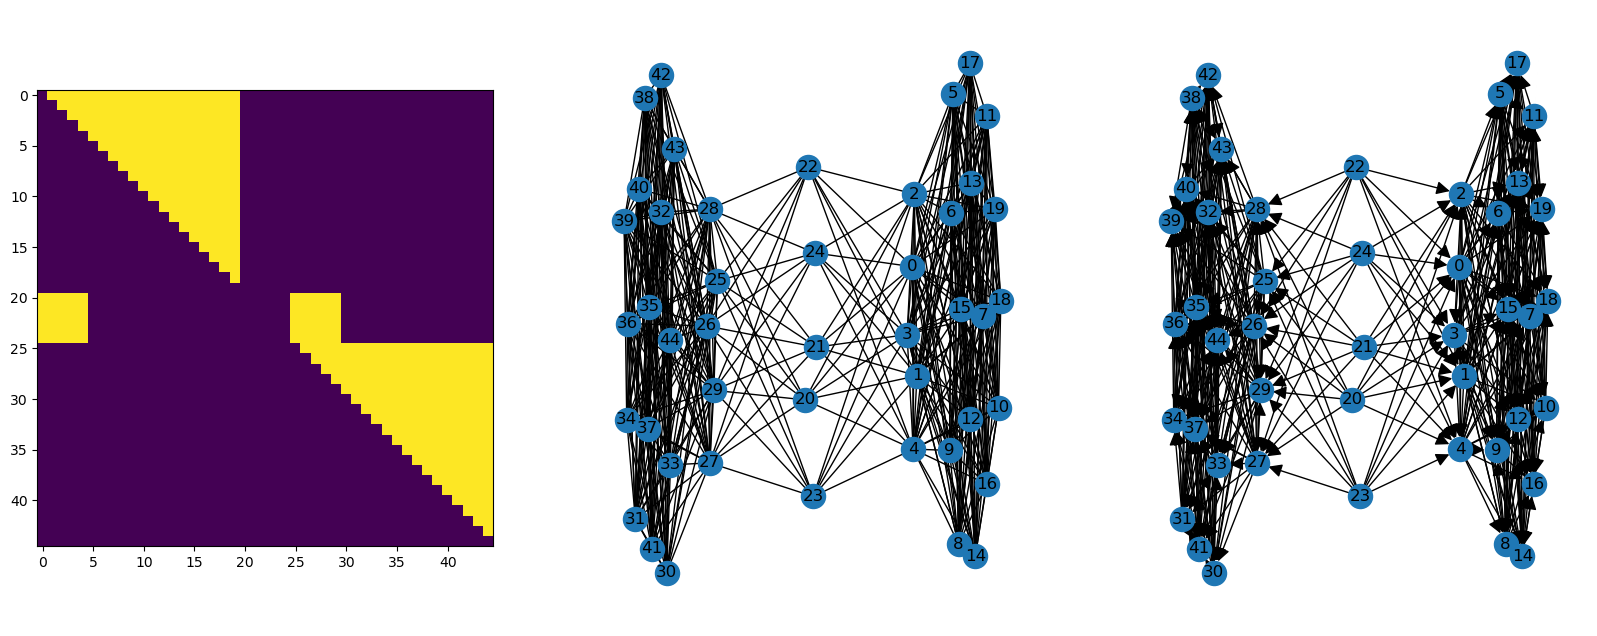

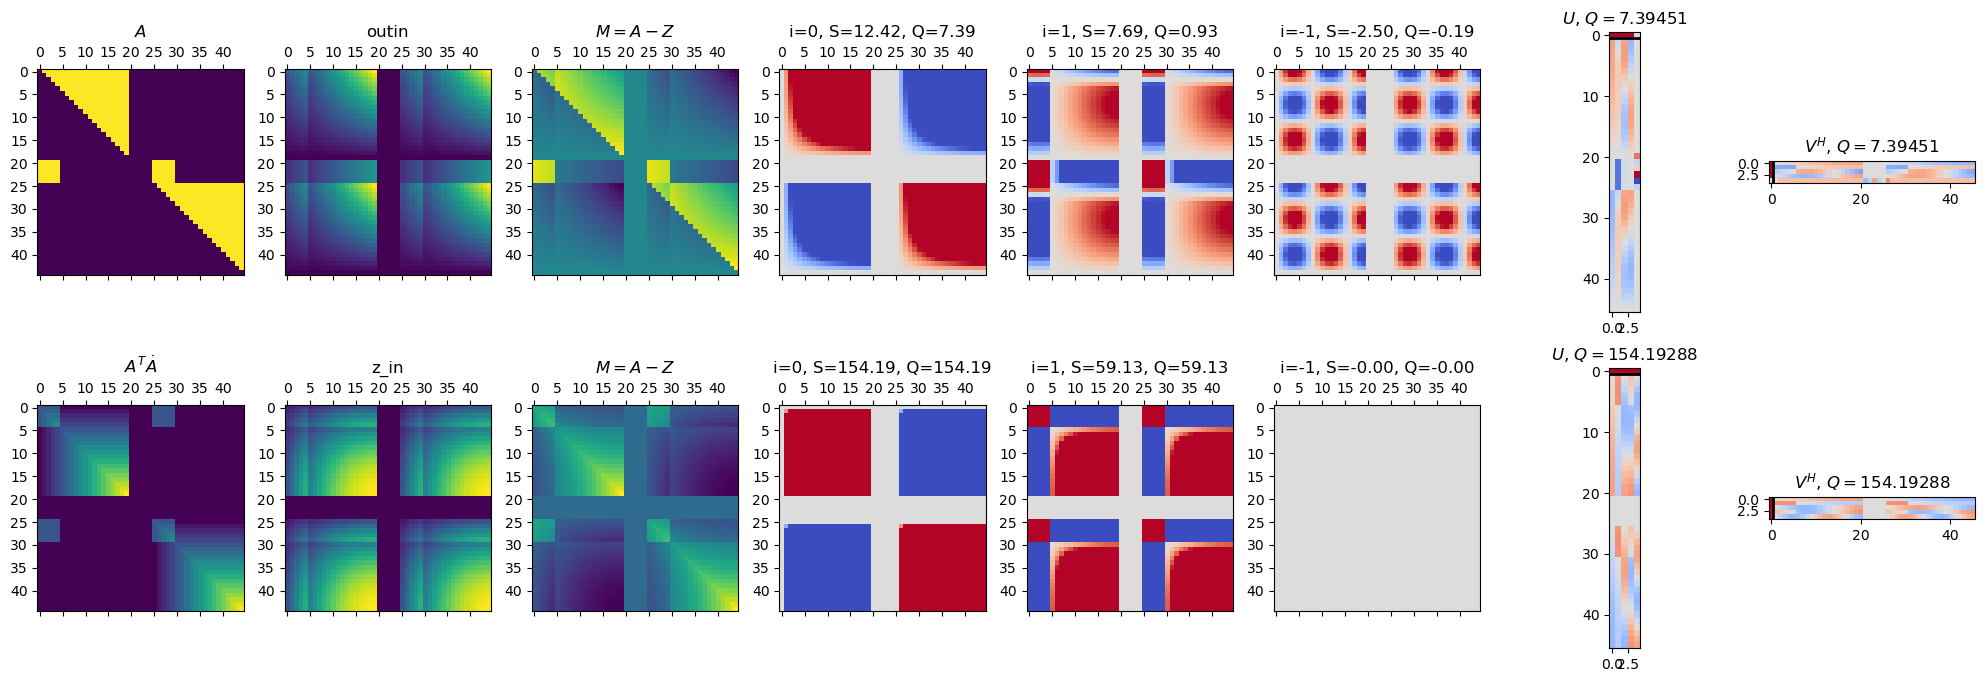

In [2]:
importlib.reload(dgsp)
n_nodes = 40

# Bifurcation example
rand = dgsp_graphs.toy_bifurc(n_nodes+5, int(n_nodes/2), 5)
dgsp_plot.plot_graph(rand, position="spring")

_ = dgsp_plot.SVD_summary(rand, nulls_names=["outin"], add_undirected="square")

## Magnetic graph

Two nodes (could be sources and sink) are connected through a set of nodes with $\delta_{in}$ and $\delta_{out}$ equal to 1. This ensures that the source node has the highest out degree while the sink node has the highest in degree.

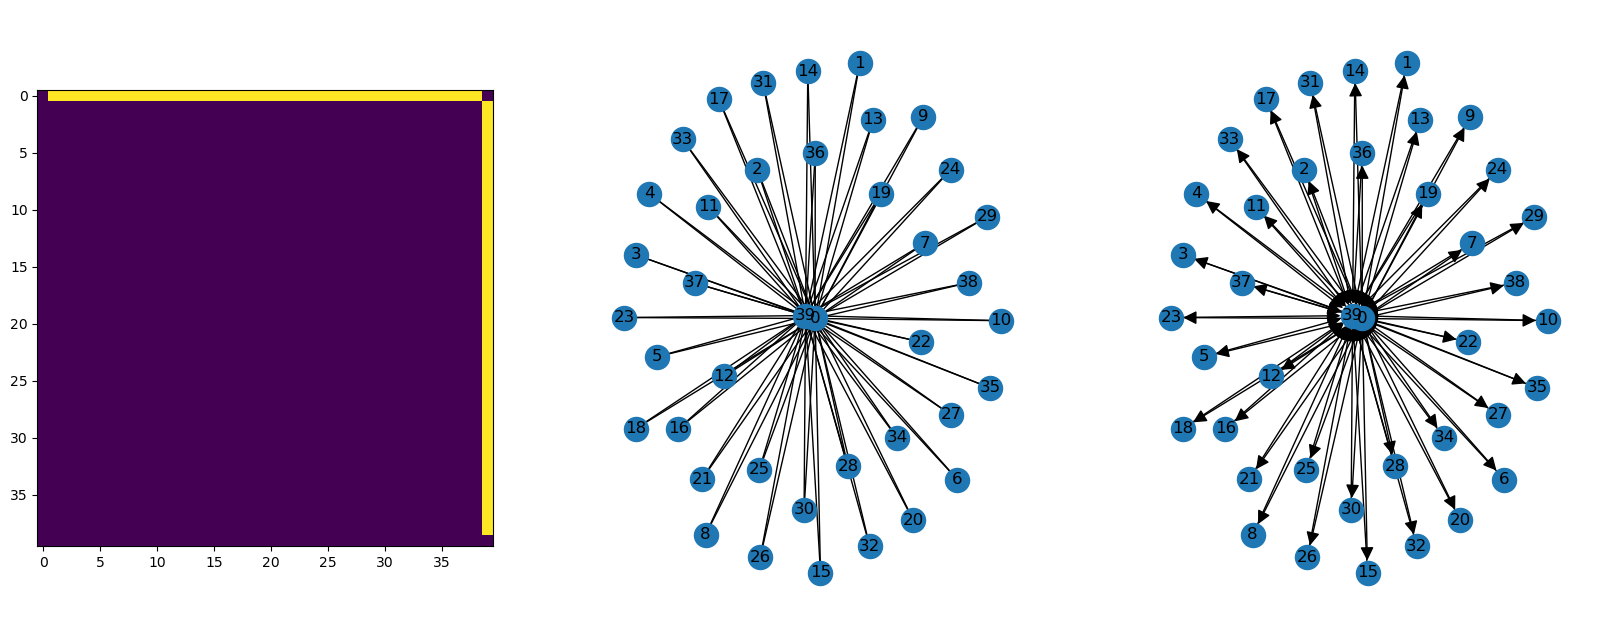

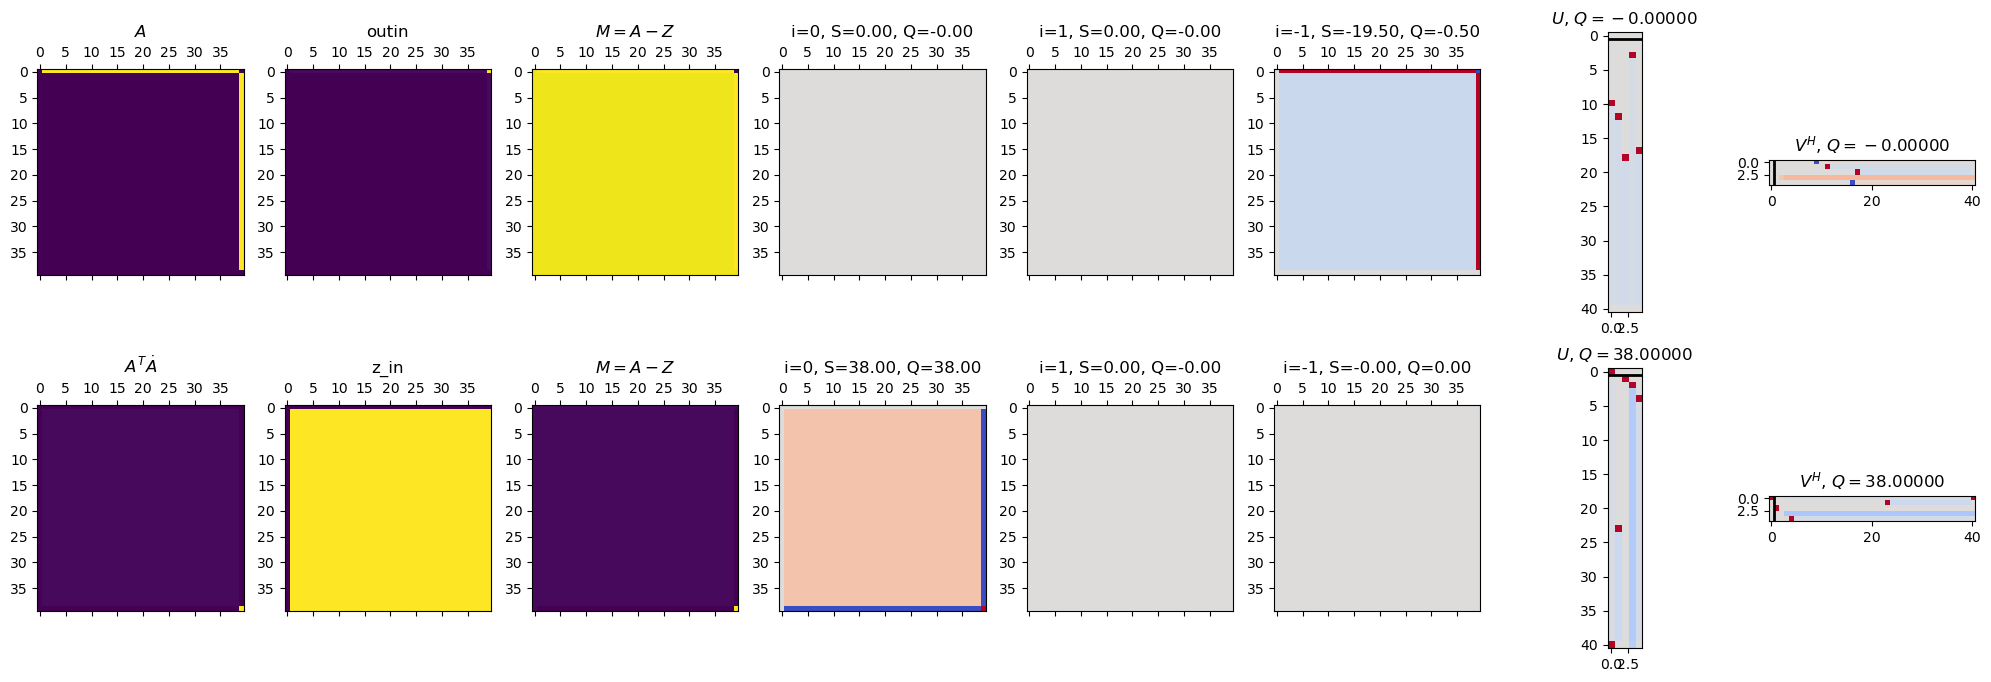

In [3]:
importlib.reload(dgsp)

rand = dgsp_graphs.toy_magnetic(n_nodes)

dgsp_plot.plot_graph(rand, position="spring")

_ = dgsp_plot.SVD_summary(rand, nulls_names=["outin"], add_undirected="square")

## Directed bipartite graph

The idea here is to consider the undirected bipartite graph and randomly assign a direction to each edge (the probability for an edge to be going from on part to the other is left as a parameter).

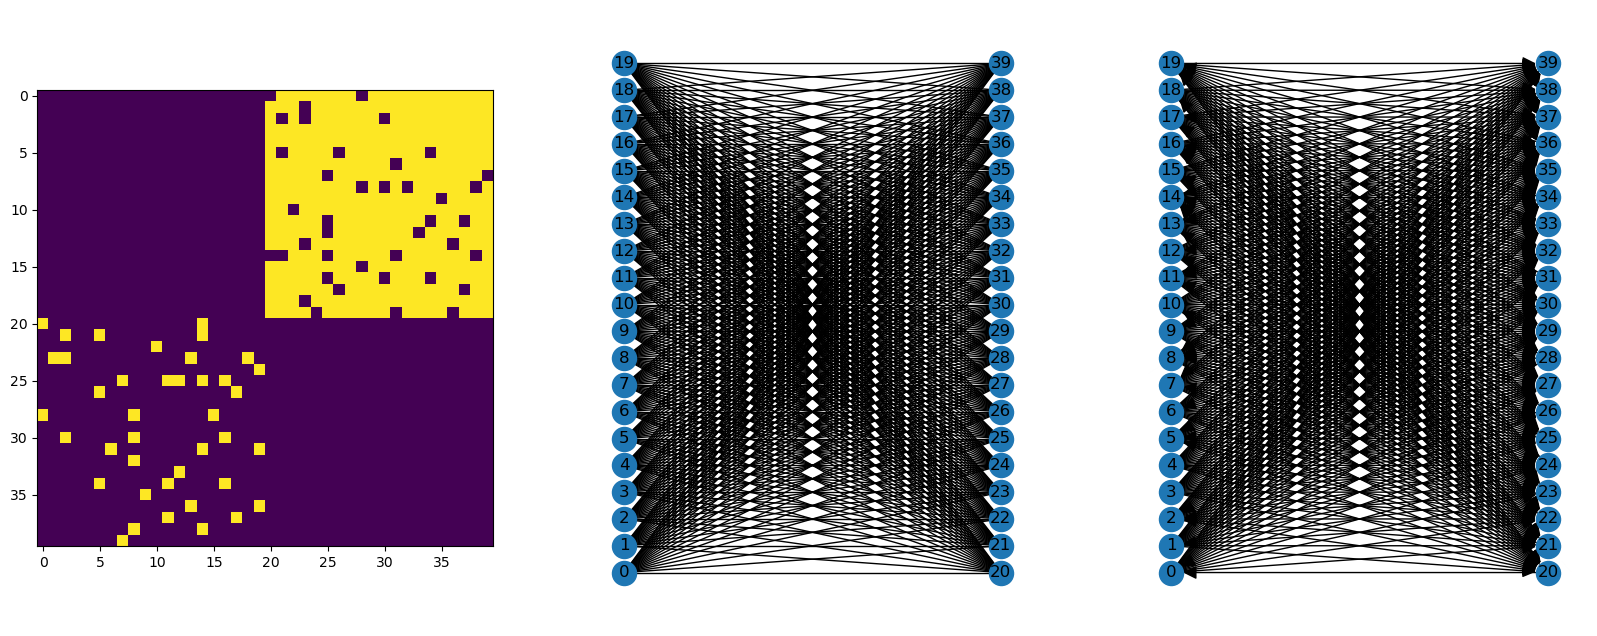

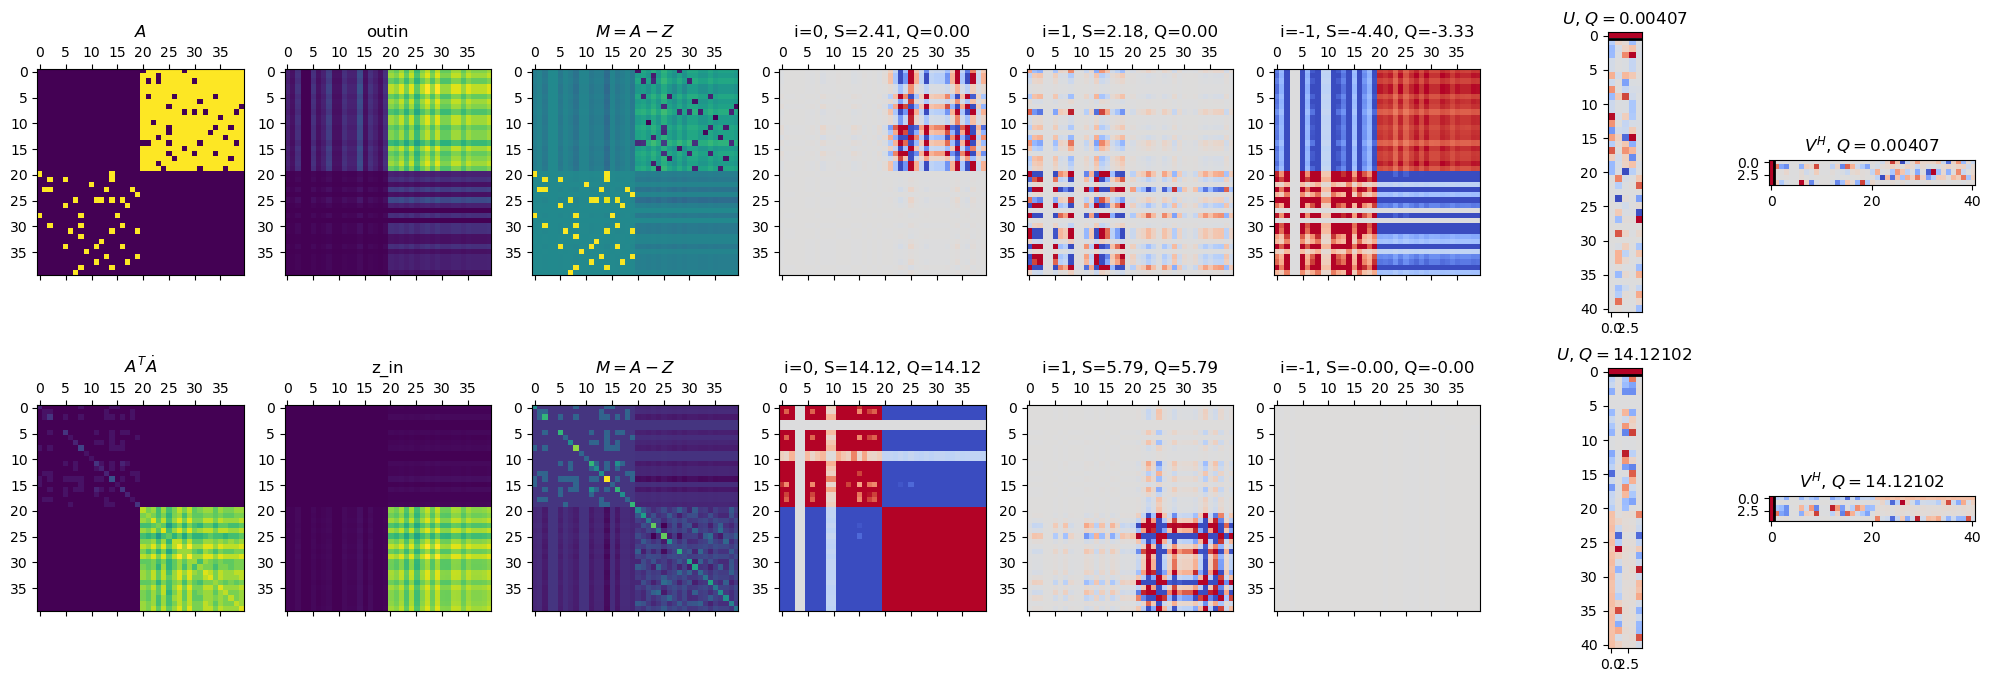

In [4]:
importlib.reload(dgsp)

rand = dgsp_graphs.toy_bipartite(n_nodes, out_prop=.9)

dgsp_plot.plot_graph(rand, position="bipart", nodes=np.arange(int(n_nodes/2)))

_ = dgsp_plot.SVD_summary(rand, nulls_names=["outin"], add_undirected="square")

## Random community graph

Here two communities are created by creating two directed graphs, which are then connected by random edges between the two. All densities and probabilites for out-edge are left as parameters.

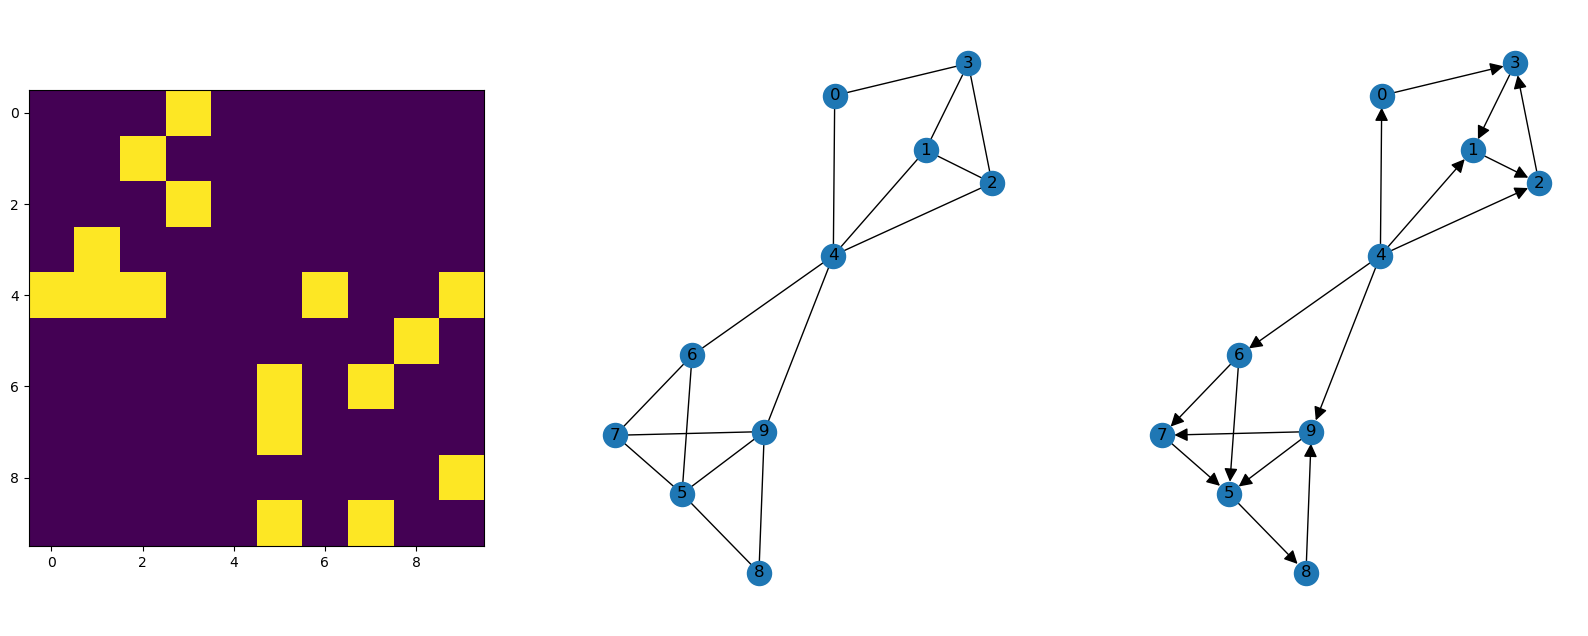

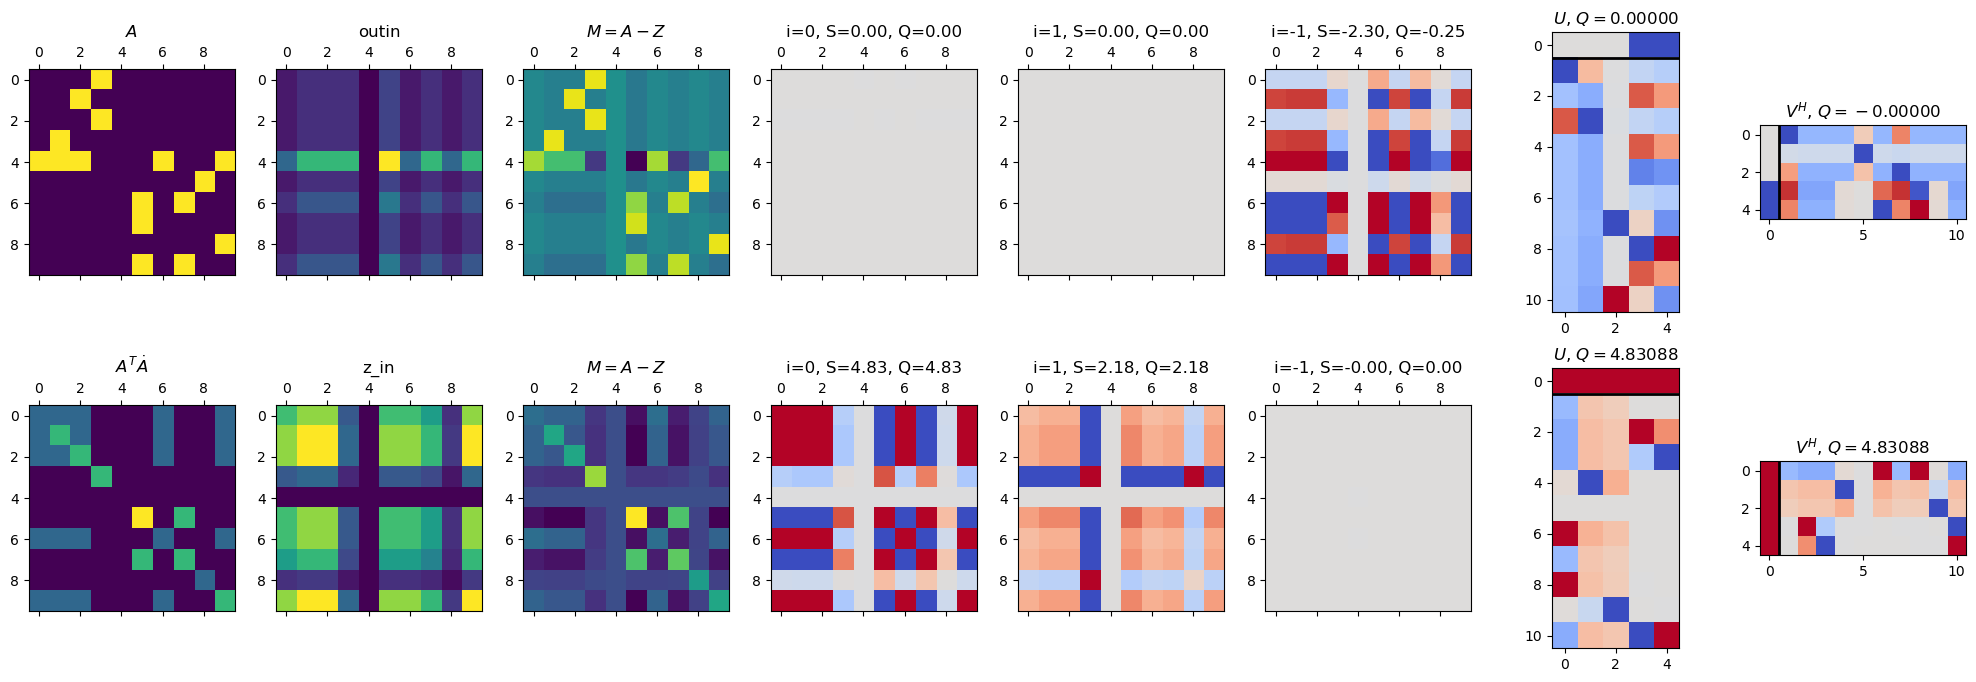

In [5]:
importlib.reload(dgsp)

n_nodes = 10
rand = dgsp_graphs.toy_random_seeded(n_nodes, edge_prob=.7, con_prob=.1, out_prob=1, seed=220367, directed=True)

dgsp_plot.plot_graph(rand, position="spring")
_ = dgsp_plot.SVD_summary(rand, nulls_names=["outin"], add_undirected="square")

### Increasing the number of nodes

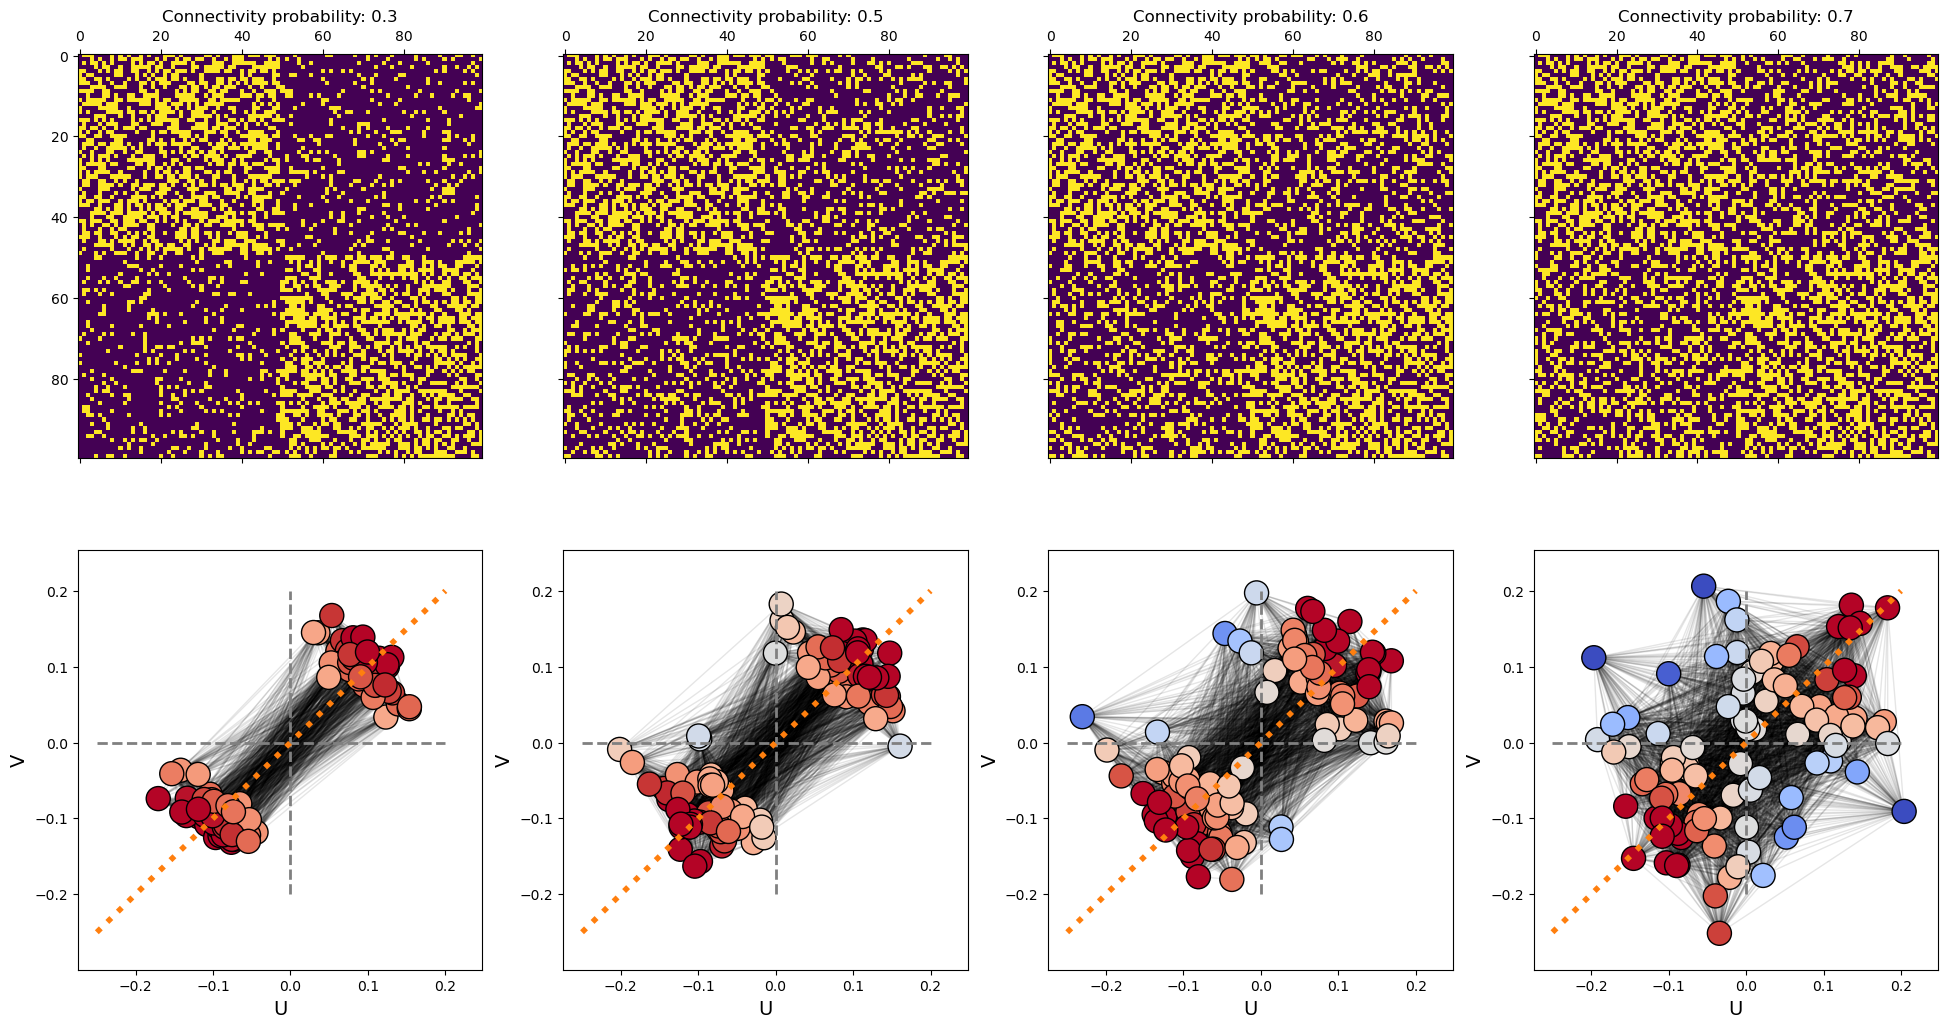

In [105]:
importlib.reload(dgsp)
importlib.reload(dgsp_graphs)

n_nodes = 100
con_probs = [.3, .5, .6, .7]

fig, axes = plt.subplots(nrows=2, ncols=len(con_probs), figsize=(6*len(con_probs), 12), sharex="row", sharey="row")

for i, con_prob in enumerate(con_probs):
    rand = dgsp_graphs.toy_random_seeded(n_nodes, edge_prob=1, con_prob=con_prob, out_prob=.5, seed=220367, directed=True)
    mod_mat = dgsp.modularity_matrix(rand)

    U, S, Vh = dgsp.sorted_SVD(mod_mat)
    V = Vh.T

    axes[0, i].set_title(f"Connectivity probability: {con_prob}")
    axes[0, i].matshow(rand)

    graph_pos = {i: (U[i, 0].real, V[i, 0].real) for i in range(rand.shape[0])}
    G = nx.Graph(rand)
    nx.draw_networkx_edges(G, pos=graph_pos, alpha=.1, ax=axes[1, i])
    axes[1, i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    colors = np.concatenate([np.ones(n_nodes//2), -np.ones(n_nodes//2)])
    colors = U[:, 0] * V[:, 0]
    axes[1, i].scatter(U[:, 0], V[:, 0], s=300, alpha=1, edgecolors="k", c=colors, cmap="coolwarm", vmin=-.01, vmax=.01)

    axes[1, i].plot([0]*2, [-.2, .2], "--", color="gray", lw=2)
    axes[1, i].plot([-.25, .2], [0]*2, "--", color="gray", lw=2)

    axes[1, i].plot([-.25, .2], [-.25, .2], ":", color="tab:orange", lw=4)

    axes[1, i].set_xlabel("U", fontsize=14)
    axes[1, i].set_ylabel("V", fontsize=14)

## Benchmarking the identification of communities

Investigate how the SVD approach is able to recover the communities in the random graphs example. One could imagine having a look at the prediction error as a function of:
- the within-community edge probability (`edge_prob`),
- the connecting edge probability (`con_prob`),
- and the directedness of the connecting edges (`out_prob`).

In [170]:
importlib.reload(dgsp)

e_prob_range = np.linspace(0.1, 1, 19)
con_prob_range = np.linspace(0.1, 1, 19)

out_prob_range = [0.1, 0.5, 0.9]

n_repeat = 100
all_null_models = ["z_in", "z_out", "z_inout", "z_outin"]

all_benchmark_res = np.zeros((len(all_null_models), n_repeat, len(e_prob_range), len(con_prob_range), len(out_prob_range), 4))

for null_id, null_model in enumerate(all_null_models):
    all_benchmark_res[null_id] = dgsp.SVD_benchmark(e_prob_range=e_prob_range, con_prob_range=con_prob_range, out_prob_range=out_prob_range, n_nodes=10, null_model=null_model.split("_")[-1], n_repeats=n_repeat)

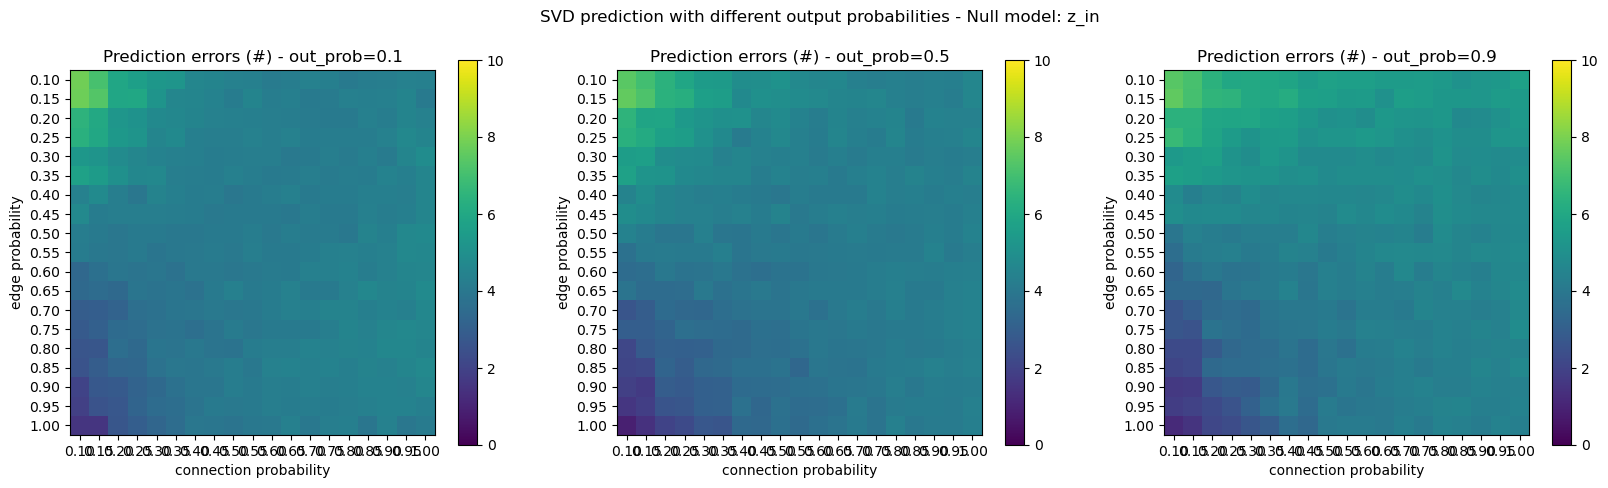

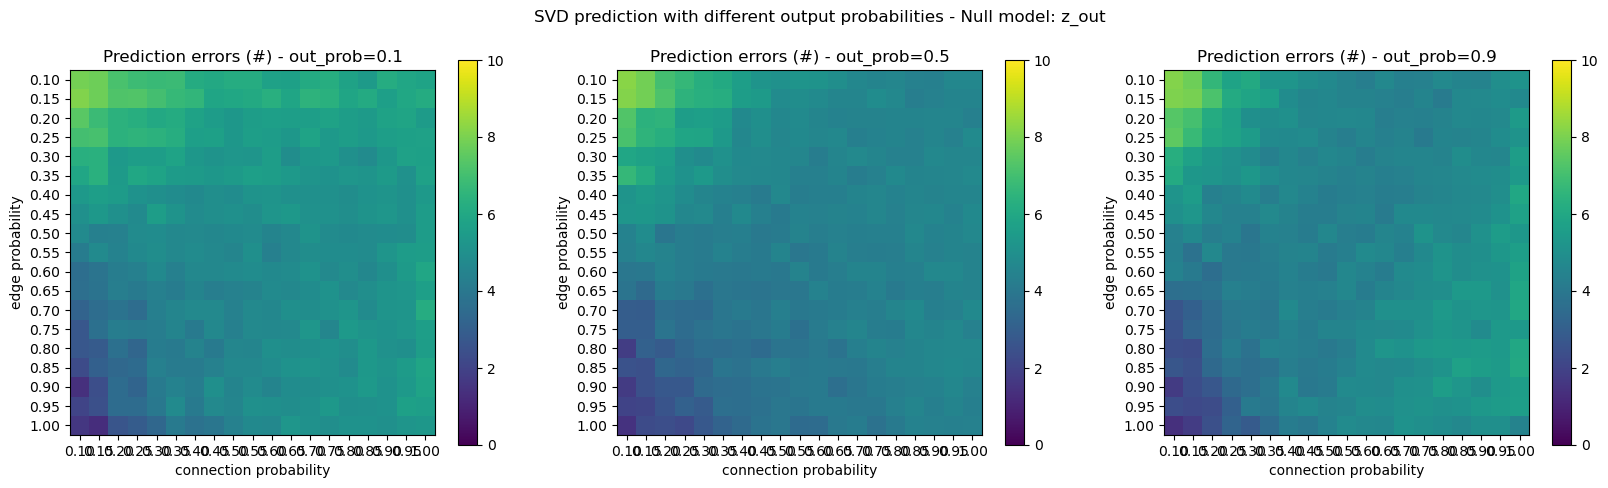

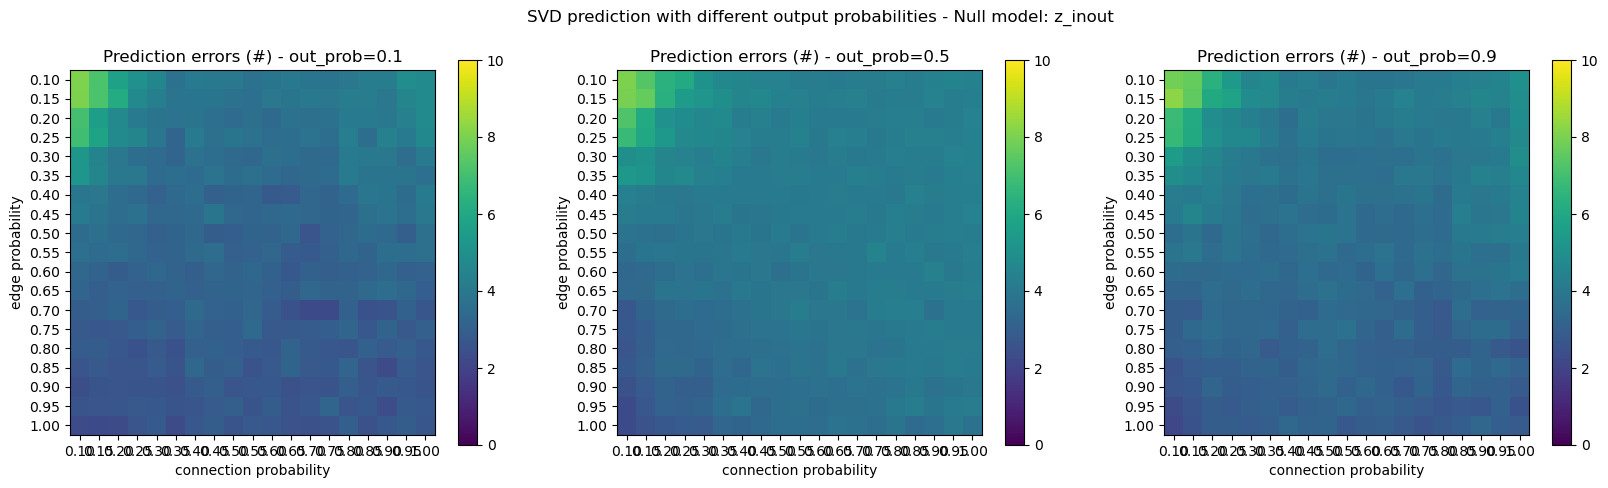

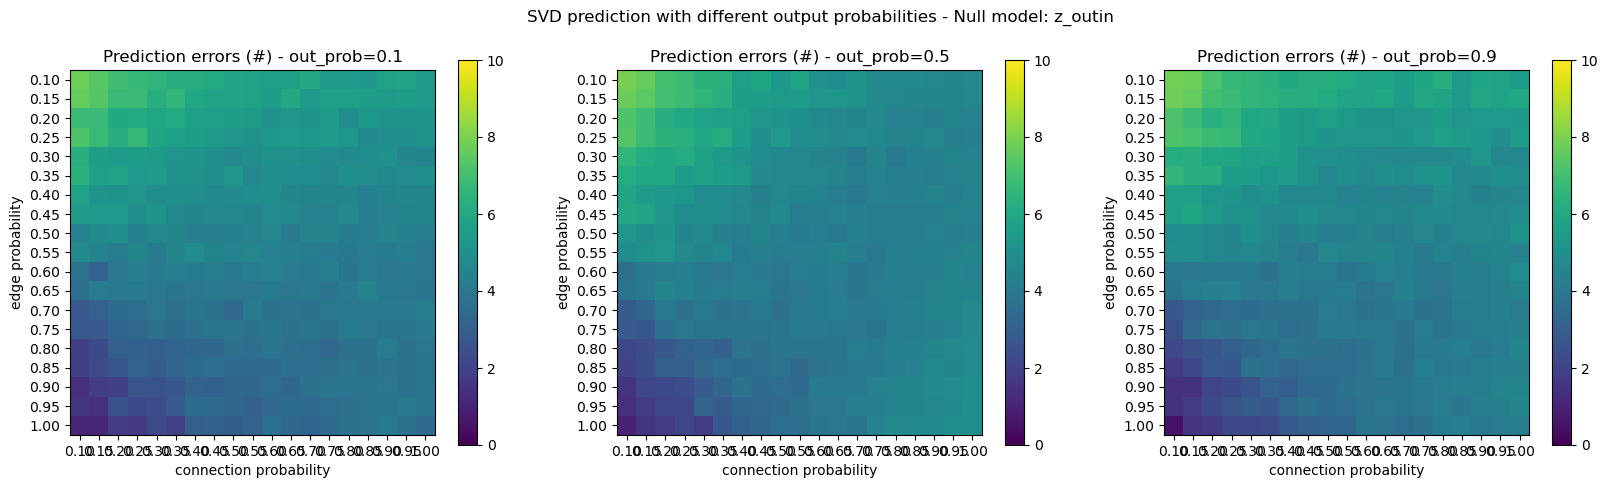

In [173]:
for null_id, null_model in enumerate(all_null_models):
    dgsp.plot_benchmark_results(all_benchmark_res[null_id], e_prob_range, con_prob_range, out_prob_range, null_model)